In [1]:
# Data 608 Story 3 - Tage N Singh 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define the URL
url = 'https://raw.githubusercontent.com/tagensingh/sps_data608_story3/main/data_608_story3.csv'

# Read the Github data into a DataFrame
df = pd.read_csv(url)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   state_abbrev      50 non-null     object 
 1   RATE              50 non-null     float64
 2   DEATHS            50 non-null     int64  
 3   state_name        50 non-null     object 
 4   nbr_gun_policies  50 non-null     int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 2.1+ KB


In [4]:
# Segregating data into 5 parts based on the percentages (0%, 20%, 40%, 60%, 80%, and 100%).
bin_edges = np.percentile(df['nbr_gun_policies'], np.linspace(0, 100, 6))

# Create bin labels
labels = ['Very Lax', 'Lax', 'Moderate', 'Strict', 'Very Strict']

# Cut the data into bins using calculated edges
df['Likert_Scale'] = pd.cut(df['nbr_gun_policies'], bins=bin_edges, labels=labels, include_lowest=True)

In [5]:
# Calculating the frequency of each category in the Likert Scale column
likert_scale_freq = df['Likert_Scale'].value_counts()

# Print the frequency
print(likert_scale_freq)

Likert_Scale
Very Lax       12
Moderate       11
Very Strict    10
Lax             9
Strict          8
Name: count, dtype: int64


C:\Users\tsingh.AP\AppData\Local\Temp\ipykernel_12268\481143992.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  med_death_rate_by_likert = df.groupby('Likert_Scale')['RATE'].median()


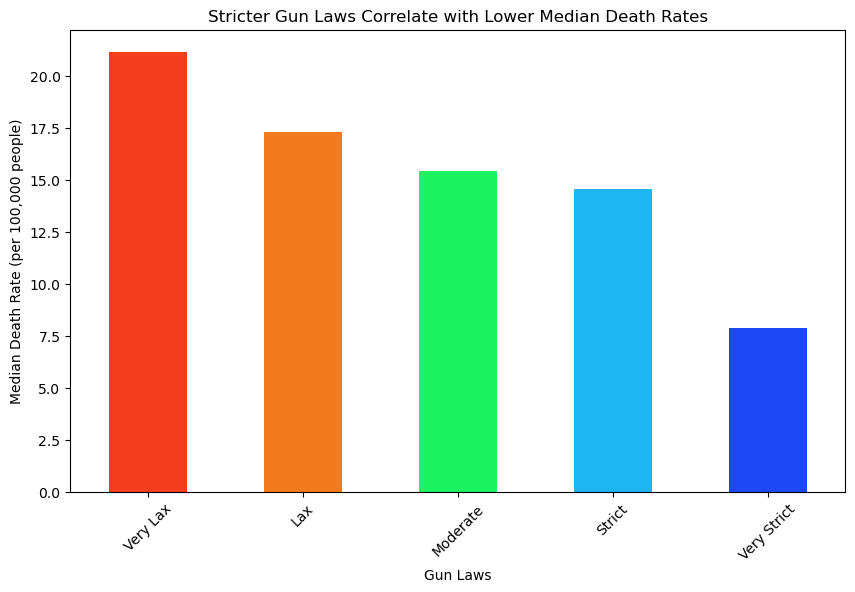

In [6]:
# Define a color mapping for Gun Laws (Likert scale categories)
gun_laws_colors = {
    'Very Lax': '#f33d1d',         # Very Lax
    'Lax': '#f37a1d',              # Lax
    'Moderate': '#1df361',         # Moderate
    'Strict': '#1db6f3',           # Strict
    'Very Strict': '#1d48f3'       # Very Strict
}

# Calculate the median death rate for each Likert scale category
med_death_rate_by_likert = df.groupby('Likert_Scale')['RATE'].median()


# Plot the bar chart with custom colors
plt.figure(figsize=(10, 6))
med_death_rate_by_likert.plot(kind='bar', color=[gun_laws_colors[l] for l in med_death_rate_by_likert.index])
plt.title('Stricter Gun Laws Correlate with Lower Median Death Rates')
plt.xlabel('Gun Laws')
plt.ylabel('Median Death Rate (per 100,000 people)')
plt.xticks(rotation=45)
plt.show()

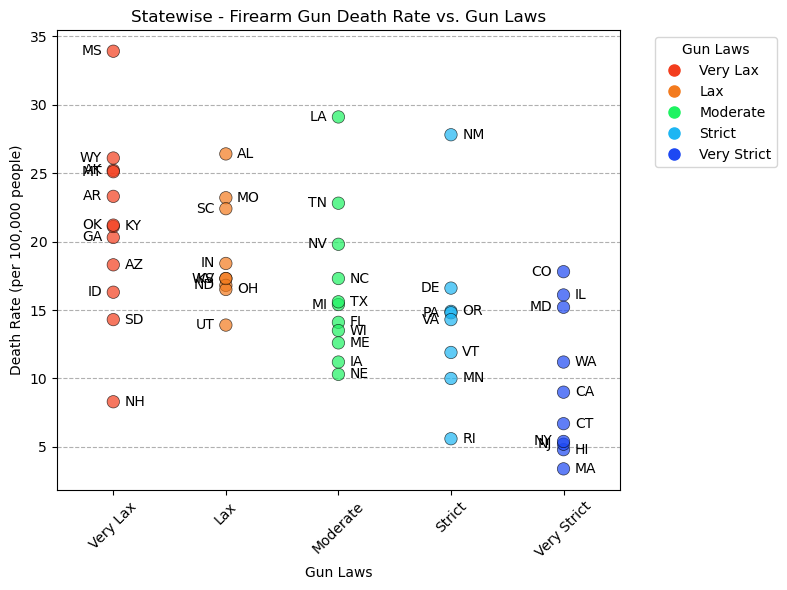

In [7]:
# Define a color mapping for Gun Laws (Likert scale categories)
gun_laws_colors = {
    'Very Lax': '#f33d1d',         # Very Lax
    'Lax': '#f37a1d',              # Lax
    'Moderate': '#1df361',         # Moderate
    'Strict': '#1db6f3',           # Strict
    'Very Strict': '#1d48f3'       # Very Strict
}

# Map Gun Laws (Likert scale values) to colors for each data point
colors = df['Likert_Scale'].map(gun_laws_colors)

# Define the Likert scale order and corresponding positions
likert_order = ['Very Lax', 'Lax', 'Moderate', 'Strict', 'Very Strict']
likert_positions = list(range(1, len(likert_order) + 1))

# Map Likert scale values to their positions
df['Likert_Position'] = df['Likert_Scale'].apply(lambda x: likert_positions[likert_order.index(x)])

# Create the scatter plot with Likert scale on the x-axis
plt.figure(figsize=(8, 6))  # Adjust the figure size
scatter = plt.scatter(df['Likert_Position'], df['RATE'], c=colors, s=80, alpha=0.7, edgecolors='k', linewidths=0.5, marker='o', zorder=2)

# Create a custom legend based on gun_laws_colors
legend_labels = gun_laws_colors.keys()
legend_handles = [plt.Line2D([0], [0], marker='o', color=color, markersize=8, label=label, linestyle='None') for label, color in gun_laws_colors.items()]
plt.legend(handles=legend_handles, labels=legend_labels, title='Gun Laws', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display state labels to alternate between left and right of the bubbles
for i, txt in enumerate(df['state_abbrev']):
    position = df['Likert_Position'][i]
    x_offset = 0.1 if i % 2 == 0 else -0.1  # Alternate label position based on index
    plt.annotate(txt, (position + x_offset, df['RATE'][i]), fontsize=10, ha='left' if i % 2 == 0 else 'right', va='center')

# Adjust x-axis limits to reduce the gap
plt.xlim(min(likert_positions) - 0.5, max(likert_positions) + 0.5)

plt.title('Statewise - Firearm Gun Death Rate vs. Gun Laws')
plt.xlabel('Gun Laws')
plt.ylabel('Death Rate (per 100,000 people)')
plt.grid(True, axis='y', linestyle='--', zorder=1)
plt.xticks(likert_positions, likert_order, rotation=45)  # Rotate x-axis labels by 45 degrees for readability
plt.tight_layout()

plt.show()
